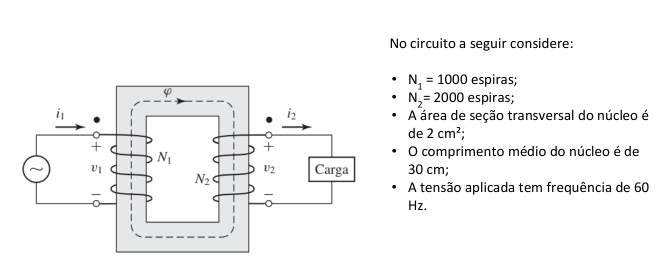

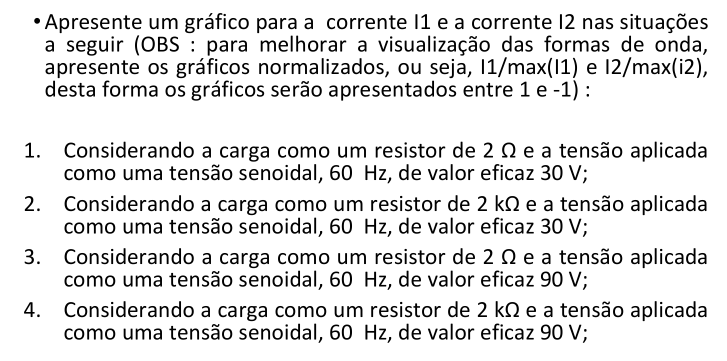

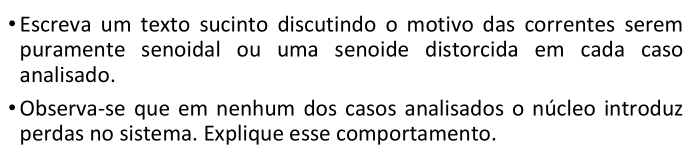

# Solução

Algumas considerações devem ser feitas:

* O sistema descrito é na verdade um transformador;
* Considera-se que o fluxo no núcleo segue exatamente a curva BxH do material do núcleo;
* Sabe-se com segurança o comportamento do sistema dentro do intervalo de dados disponível;

Considerando os valores de $\vec B$ do conjunto de dados e as dimensões do núcleo, é seguro afirmar que o fluxo magnético líquido no núcleo para cada valor de densidade é:

$\Phi = \vec B A_c$

$A_c$ é a área de seção transversal do núcleo.

Das simplificações das leis de Faraday e Ampère sabe-se que:

$F_m = ni = H_cl_c$

Portanto, para uma bobina $x$ com $n_x$ enrolamentos, é possível determinar a corrente em cada bobina para cada valor de $H$ disponível nos dados.

$i = \frac{H_cl_c}{n}$

Considerando que a variação do fluxo concatenado na bobina faz aparecer uma tensão nos terminais e que uma tensão alternada nos terminais faz surgir um fluxo concatenado, é possível relacionar tensão com os dados de densidade de fluxo para o material que forma o núcleo da seguinte forma:

Supondo que a variação de fluxo no núcleo seja:

$\phi(t) = \phi_{ins} \sin(\omega t) $

$\lambda(t) = n_x \phi_{ins} \sin(\omega t) $

$E_{ind} = \frac{d\lambda(t)}{dt} = n_x \phi_{ins} \omega \cos(\omega t)$ 

Dessa forma, para cada valor de tensão nos terminais é possível associar um valor de $\phi = \phi_{ins} = \frac{n_x \phi_{ins} \omega}{n_x \omega}$

Ou seja,

$\phi = \frac{E}{n_x \omega}$

Então, considerando que para o sistema é possível determinar a corrente para cada valor de $\phi$, é possível então determinar a corrente de magnetização da bobina pra uma dada tensão aplicada nos terminais.

Primeiro considere que a tensão aplicada é:

$v(t) = V_{max}\cos(\omega t)$

Agora para cada valor de $v(t)$ calcula-se o $\phi$:

$\phi = \frac{E}{n_x \omega}$

$i = \frac{H_cl_c}{n}$